In [1]:
import matplotlib.pyplot as plt
import string
from pandas import read_csv
import math
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
from sklearn import metrics

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
godseye=read_csv("nikhila.csv")

In [3]:
type(godseye)

pandas.core.frame.DataFrame

In [4]:
godseye.dtypes

T             int64
LX          float64
LY          float64
RX          float64
RY          float64
name         object
gender       object
dyslexia     object
dtype: object

In [5]:
godseye=godseye.drop([0,1],axis='rows')

In [6]:
godseye['ll']=np.sqrt(((godseye['LX'])**2+((godseye['LY'])**2)))
godseye['rr']=np.sqrt(((godseye['RX'])**2+((godseye['RY'])**2)))
#godseye['lm']=np.round(godseye['LY']/godseye['LX'])
#godseye['rm']=np.round(godseye['RY']/godseye['RX'])

In [7]:
godseye

,T,LX,LY,RX,RY,name,gender,dyslexia,ll,rr
2,40,-65536.0,0.0,-65536.00,0.000000e+00,752pj3,male,no,6.553600e+04,6.553600e+04
3,60,-65536.0,-65536.0,-99999999.96,0.000000e+00,752pj3,male,no,9.268190e+04,1.000000e+08
4,80,-65537.0,-65536.0,-65537.00,-6.550000e+13,752pj3,male,no,9.268261e+04,6.550000e+13
5,100,-65536.0,-65536.0,-65538.00,0.000000e+00,752pj3,male,no,9.268190e+04,6.553800e+04
6,120,-131073.0,-65536.0,-131074.00,1.000000e+08,752pj3,male,no,1.465438e+05,1.000001e+08
...,...,...,...,...,...,...,...,...,...,...
40495,29900,-425992.0,2752538.0,-425992.00,2.621463e+06,782sc3,male,no,2.785307e+06,2.655850e+06
40496,29920,-425992.0,2818073.0,-425992.00,2.752537e+06,782sc3,male,no,2.850089e+06,2.785306e+06
40497,29940,-425992.0,2555926.0,-425992.00,2.424853e+06,782sc3,male,no,2.591183e+06,2.461987e+06
40498,29960,-425992.0,2359315.0,-425992.00,2.359314e+06,782sc3,male,no,2.397465e+06,2.397464e+06


In [8]:
godseye=godseye.drop(['LX','LY','RX','RY','name'],axis='columns')

In [9]:
godseye.describe()

,T,ll,rr
count,40498.000000,4.049800e+04,4.049800e+04
mean,17552.594696,4.171420e+11,4.148180e+11
std,10768.554770,4.668895e+12,4.749779e+12
min,0.000000,0.000000e+00,0.000000e+00
25%,8420.000000,2.694187e+06,2.688833e+06
50%,16860.000000,5.732113e+06,5.737800e+06
75%,25860.000000,9.968615e+06,9.965040e+06
max,39980.000000,9.800000e+13,1.057940e+14


In [10]:
#godseye=godseye.query('ll < 10**11 and ll > 0')
#godseye=godseye.query('rr < 10**11 and rr > 0')

In [11]:
godseye.describe()

,T,ll,rr
count,40498.000000,4.049800e+04,4.049800e+04
mean,17552.594696,4.171420e+11,4.148180e+11
std,10768.554770,4.668895e+12,4.749779e+12
min,0.000000,0.000000e+00,0.000000e+00
25%,8420.000000,2.694187e+06,2.688833e+06
50%,16860.000000,5.732113e+06,5.737800e+06
75%,25860.000000,9.968615e+06,9.965040e+06
max,39980.000000,9.800000e+13,1.057940e+14


In [12]:
godseye

,T,gender,dyslexia,ll,rr
2,40,male,no,6.553600e+04,6.553600e+04
3,60,male,no,9.268190e+04,1.000000e+08
4,80,male,no,9.268261e+04,6.550000e+13
5,100,male,no,9.268190e+04,6.553800e+04
6,120,male,no,1.465438e+05,1.000001e+08
...,...,...,...,...,...
40495,29900,male,no,2.785307e+06,2.655850e+06
40496,29920,male,no,2.850089e+06,2.785306e+06
40497,29940,male,no,2.591183e+06,2.461987e+06
40498,29960,male,no,2.397465e+06,2.397464e+06


In [13]:
godseye.describe()

,T,ll,rr
count,40498.000000,4.049800e+04,4.049800e+04
mean,17552.594696,4.171420e+11,4.148180e+11
std,10768.554770,4.668895e+12,4.749779e+12
min,0.000000,0.000000e+00,0.000000e+00
25%,8420.000000,2.694187e+06,2.688833e+06
50%,16860.000000,5.732113e+06,5.737800e+06
75%,25860.000000,9.968615e+06,9.965040e+06
max,39980.000000,9.800000e+13,1.057940e+14


In [14]:
#godseye=godseye.head()
#godseye=godseye[['T','ll','rr']]
godseye.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40498 entries, 2 to 40499
Data columns (total 5 columns):
T           40498 non-null int64
gender      40498 non-null object
dyslexia    40498 non-null object
ll          40498 non-null float64
rr          40498 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.9+ MB


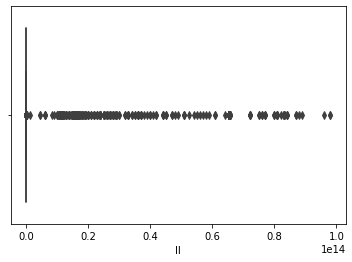

In [15]:
#plt.plot(godseye['T'],godseye['ll'])
sns.boxplot(x=godseye['ll'])

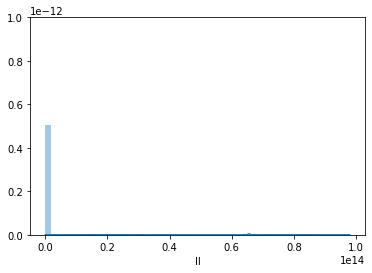

In [16]:
sns.distplot(godseye['ll'])

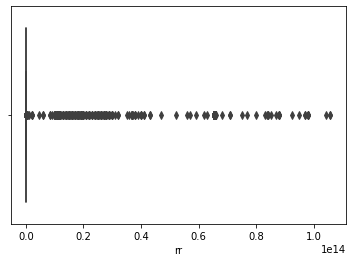

In [17]:
sns.boxplot(x=godseye['rr'])

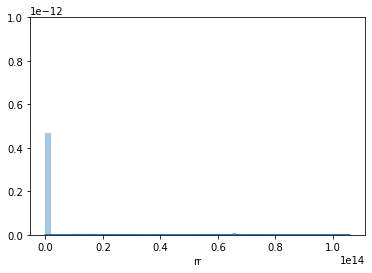

In [18]:
sns.distplot(godseye['rr'])

In [19]:
godseye

,T,gender,dyslexia,ll,rr
2,40,male,no,6.553600e+04,6.553600e+04
3,60,male,no,9.268190e+04,1.000000e+08
4,80,male,no,9.268261e+04,6.550000e+13
5,100,male,no,9.268190e+04,6.553800e+04
6,120,male,no,1.465438e+05,1.000001e+08
...,...,...,...,...,...
40495,29900,male,no,2.785307e+06,2.655850e+06
40496,29920,male,no,2.850089e+06,2.785306e+06
40497,29940,male,no,2.591183e+06,2.461987e+06
40498,29960,male,no,2.397465e+06,2.397464e+06


In [20]:
def outliersDetector(contact_df, columnName):
    Q1 = contact_df[columnName].quantile(0.25)
    Q3 = contact_df[columnName].quantile(0.75)


    IQR = Q3 - Q1

    lower_outlier_bound = Q1 - 1.5*IQR
    upper_outlier_bound = Q3 + 1.5*IQR

    print("Q1", Q1)
    print("Q3", Q3)

    print("IQR", IQR)

    print("lower_outlier_bound", lower_outlier_bound)
    print("upper_outlier_bound", upper_outlier_bound)
    print()
    print("outliers for eye variable are : ")
    print(contact_df[(contact_df[columnName] < lower_outlier_bound) | (contact_df[columnName] > upper_outlier_bound)])

    print(contact_df[(contact_df[columnName] < lower_outlier_bound) | (contact_df[columnName] > upper_outlier_bound)].index)
    # dropping outliers
    contact_df.drop(contact_df[(contact_df[columnName]  < lower_outlier_bound) | (contact_df[columnName]  > upper_outlier_bound)].index, inplace=True)

In [21]:
#lm=godseye['ll'].median()
#rm=godseye['ll'].median()

In [22]:
outliersDetector(godseye,'ll')

Q1 2694187.4266368803
Q3 9968614.664630232
IQR 7274427.237993352
lower_outlier_bound -8217453.430353148
upper_outlier_bound 20880255.52162026

outliers for eye variable are : 
           T gender dyslexia            ll            rr
11       220   male       no  6.550000e+13  2.702135e+05
16       320   male       no  6.550000e+13  2.702162e+05
20       400   male       no  6.550000e+13  2.000002e+08
23       460   male       no  6.550000e+13  1.000005e+08
24       480   male       no  1.000005e+08  1.000005e+08
...      ...    ...      ...           ...           ...
40251  25020   male       no  2.417097e+07  6.952251e+06
40252  25040   male       no  2.404483e+07  2.399977e+07
40253  25060   male       no  2.387381e+07  2.374790e+07
40254  25080   male       no  2.247917e+07  2.318203e+07
40465  29300   male       no  2.400000e+13  1.528712e+07

[1920 rows x 5 columns]
Int64Index([   11,    16,    20,    23,    24,    29,    30,    32,    34,
               44,
            ...
     

In [23]:
godseye.iloc[2250]

T                 18580
gender            male 
dyslexia            yes
ll          2.98978e+06
rr          2.87255e+06
Name: 2429, dtype: object

In [24]:
#godseye['ll']=godseye['ll'].fillna(lm)

In [25]:
outliersDetector(godseye,'rr')

Q1 2641891.2251539053
Q3 9451219.306548627
IQR 6809328.081394722
lower_outlier_bound -7572100.896938178
upper_outlier_bound 19665211.42864071

outliers for eye variable are : 
           T gender dyslexia            ll            rr
3         60   male       no  9.268190e+04  1.000000e+08
4         80   male       no  9.268261e+04  6.550000e+13
6        120   male       no  1.465438e+05  1.000001e+08
7        140   male       no  1.310730e+05  1.000001e+08
8        160   male       no  6.842165e+04  1.000002e+08
...      ...    ...      ...           ...           ...
40235  24700   male       no  2.004052e+07  2.016998e+07
40236  24720   male       no  2.029946e+07  2.043915e+07
40237  24740   male       no  2.057894e+07  2.070835e+07
40255  25100   male       no  2.176844e+06  2.170215e+07
40256  25120   male       no  2.087043e+07  2.024788e+07

[778 rows x 5 columns]
Int64Index([    3,     4,     6,     7,     8,     9,    10,    22,    25,
               26,
            ...
      

In [26]:
outliersDetector(godseye,'rr')

Q1 2596882.501855831
Q3 9192895.800957642
IQR 6596013.299101811
lower_outlier_bound -7297137.446796885
upper_outlier_bound 19086915.749610357

outliers for eye variable are : 
           T gender dyslexia            ll            rr
1400   28000   male       no  1.809528e+07  1.963474e+07
1401   28020   male       no  1.855385e+07  1.950834e+07
1402   28040   male       no  1.861936e+07  1.919261e+07
5811   26220   male       no  1.834832e+06  1.928361e+07
5834   26680   male       no  1.922842e+07  1.909528e+07
...      ...    ...      ...           ...           ...
40207  24140   male       no  2.041384e+06  1.940993e+07
40208  24160   male       no  1.941226e+07  1.947775e+07
40213  24260   male       no  1.951916e+07  1.959317e+07
40257  25140   male       no  1.979437e+07  1.944597e+07
40259  25180   male       no  1.919286e+07  1.915568e+07

[170 rows x 5 columns]
Int64Index([ 1400,  1401,  1402,  5811,  5834,  6000,  6001,  6005,  6006,
             6033,
            ...
      

In [27]:
outliersDetector(godseye,'ll')

Q1 2589938.2812156514
Q3 9129981.735734476
IQR 6540043.454518825
lower_outlier_bound -7220126.900562586
upper_outlier_bound 18940046.917512715

outliers for eye variable are : 
           T gender dyslexia            ll            rr
5812   26240   male       no  1.910247e+07  1.896980e+07
5833   26660   male       no  1.954358e+07  5.813151e+06
6007   30140   male       no  1.910244e+07  1.878171e+07
6051   31020   male       no  1.910800e+07  1.859723e+07
6069   31380   male       no  1.922825e+07  1.822726e+07
...      ...    ...      ...           ...           ...
40217  24340   male       no  2.074296e+07  3.711734e+06
40224  24480   male       no  2.046016e+07  3.901260e+06
40258  25160   male       no  1.930665e+07  1.802271e+07
40260  25200   male       no  1.908244e+07  1.896096e+07
40261  25220   male       no  1.895020e+07  1.873399e+07

[124 rows x 5 columns]
Int64Index([ 5812,  5833,  6007,  6051,  6069,  6088, 11933, 11934, 11935,
            11936,
            ...
     

In [28]:
godseye

,T,gender,dyslexia,ll,rr
2,40,male,no,6.553600e+04,6.553600e+04
5,100,male,no,9.268190e+04,6.553800e+04
12,240,male,no,6.842165e+04,1.465443e+05
13,260,male,no,1.853645e+05,2.072456e+05
14,280,male,no,1.325384e+05,2.072452e+05
...,...,...,...,...,...
40495,29900,male,no,2.785307e+06,2.655850e+06
40496,29920,male,no,2.850089e+06,2.785306e+06
40497,29940,male,no,2.591183e+06,2.461987e+06
40498,29960,male,no,2.397465e+06,2.397464e+06


In [29]:
#outliersDetector(godseye,'ll')

In [30]:
#outliersDetector(godseye,'rr')

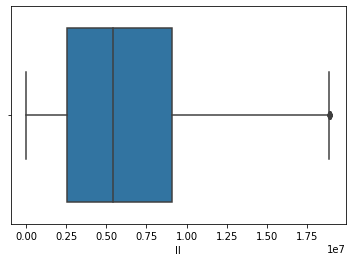

In [31]:
sns.boxplot(x=godseye['ll'])

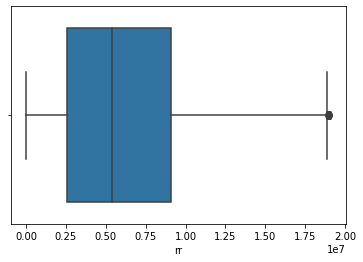

In [32]:
sns.boxplot(x=godseye['rr'])

In [33]:
godseye

,T,gender,dyslexia,ll,rr
2,40,male,no,6.553600e+04,6.553600e+04
5,100,male,no,9.268190e+04,6.553800e+04
12,240,male,no,6.842165e+04,1.465443e+05
13,260,male,no,1.853645e+05,2.072456e+05
14,280,male,no,1.325384e+05,2.072452e+05
...,...,...,...,...,...
40495,29900,male,no,2.785307e+06,2.655850e+06
40496,29920,male,no,2.850089e+06,2.785306e+06
40497,29940,male,no,2.591183e+06,2.461987e+06
40498,29960,male,no,2.397465e+06,2.397464e+06


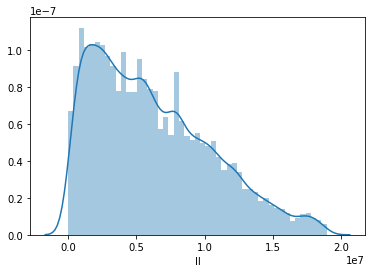

In [34]:
sns.distplot(godseye['ll'])

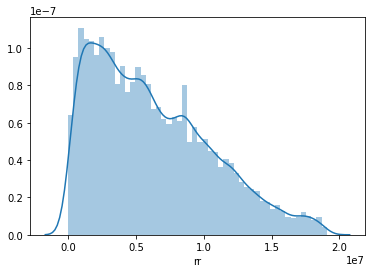

In [35]:
sns.distplot(godseye['rr'])

In [36]:
godseye.shape

(37506, 5)

In [37]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
   # res_df['T'] = le.fit_transform(res_df['T'])
  #  res_df['ll'] = le.fit_transform(res_df['ll'])
  #  res_df['rr'] = le.fit_transform(res_df['rr'])
    res_df['gender'] = le.fit_transform(res_df['gender'])
    res_df['dyslexia'] = le.fit_transform(res_df['dyslexia'])
    return res_df

In [38]:
encoded_df = preprocessor(godseye)
#train, test = train_test_split(godseye,test_size=0.2)
x=encoded_df[['T', 'll', 'rr']]
#x=preprocessing.normalize(x)

In [39]:
y=encoded_df[['dyslexia']]

In [40]:
#x=preprocessing.normalize(x)

In [41]:
#encoded_df[['T', 'll', 'rr']]=x
encoded_df

,T,gender,dyslexia,ll,rr
2,40,1,0,6.553600e+04,6.553600e+04
5,100,1,0,9.268190e+04,6.553800e+04
12,240,1,0,6.842165e+04,1.465443e+05
13,260,1,0,1.853645e+05,2.072456e+05
14,280,1,0,1.325384e+05,2.072452e+05
...,...,...,...,...,...
40495,29900,1,0,2.785307e+06,2.655850e+06
40496,29920,1,0,2.850089e+06,2.785306e+06
40497,29940,1,0,2.591183e+06,2.461987e+06
40498,29960,1,0,2.397465e+06,2.397464e+06


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [43]:
#god=RandomForestRegressor(n_estimators=20, random_state=0)
#god=god.fit(x_train,y_train)
#y_pred=god.predict(x_test)

In [44]:
#metrics.accuracy_score(y_test, ypred)

In [45]:
#god=DecisionTreeClassifier()
#god=god.fit(x_train,y_train)
#ypred=god.predict(x_test)

In [46]:
#metrics.accuracy_score(y_test, ypred)

In [47]:
#confusion_matrix(y_test,ypred)

In [48]:
god=RandomForestRegressor(n_estimators=50, random_state=0,warm_start=True)
god=god.fit(x_train,y_train.values.ravel())
y_pred=god.predict(x_test)

In [49]:
metrics.accuracy_score(y_test, y_pred.round())

0.8473740335910424

In [51]:
confusion_matrix(y_test,y_pred.round())

array([[2473,  577],
       [ 568, 3884]], dtype=int64)

In [52]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred.round()).ravel()

In [53]:
acc=(tn+tp)*100/(tp+tn+fp+fn)
acc

84.73740335910423

In [54]:
pre=tp*100/(tp+fp)
pre

87.06568034073078

In [55]:
re=tp*100/(tp+fn)
re

87.24168912848158

In [56]:
f1=(2*pre*re)/(pre+re)

In [57]:
f1

87.15359587119939